In [1]:
import pyvista as pv
import numpy as np
from PIL import Image

In [2]:
def faces_to_pyvista(faces):
    # converts faces array to pyvista type for visualization
    return np.hstack((np.full((faces.shape[0], 1), 3), faces))

# Poisson sampling

In [3]:
from mesh_poisson_disk_sampling import poisson_disk_sampling

In [ ]:
# load an example mesh
mesh = pv.examples.download_bunny()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

In [ ]:
# this is not super efficient, it may take a while for large meshes
# based on your hardware, this can take up to 10 minutes

# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = poisson_disk_sampling(vertices, faces, min_dist = None, points_to_sample = None, num_points = 1000, verbose = True)

In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

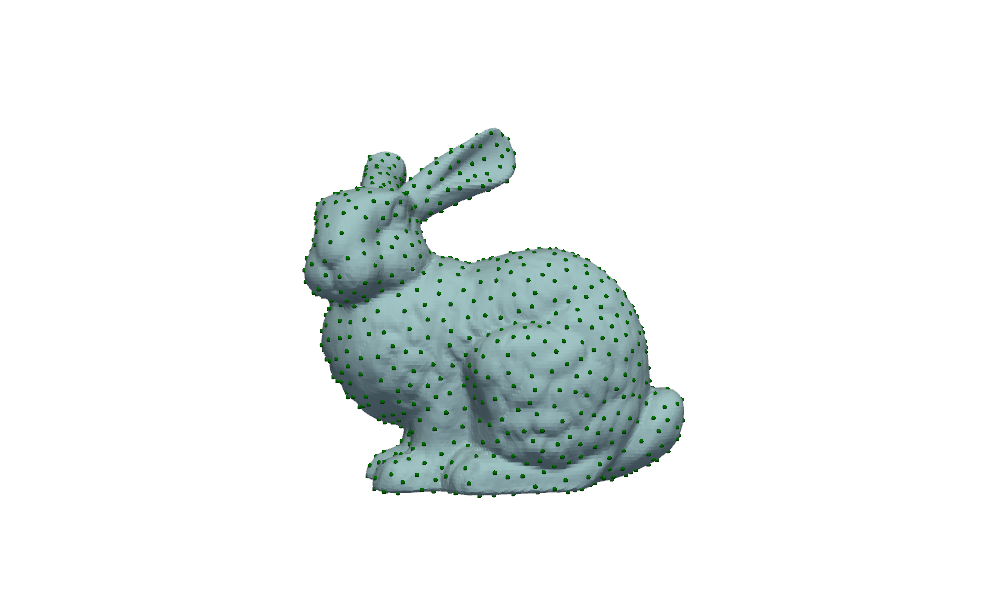

In [2]:
# this is what it looks like
Image.open('images/bunny_poisson.png')

# Uniform sampling

In [7]:
from mesh_poisson_disk_sampling import uniform_sampling

In [8]:
# load an example mesh
mesh = pv.examples.download_bunny()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

In [9]:
# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = uniform_sampling(vertices, faces, num_points = 1000)

In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

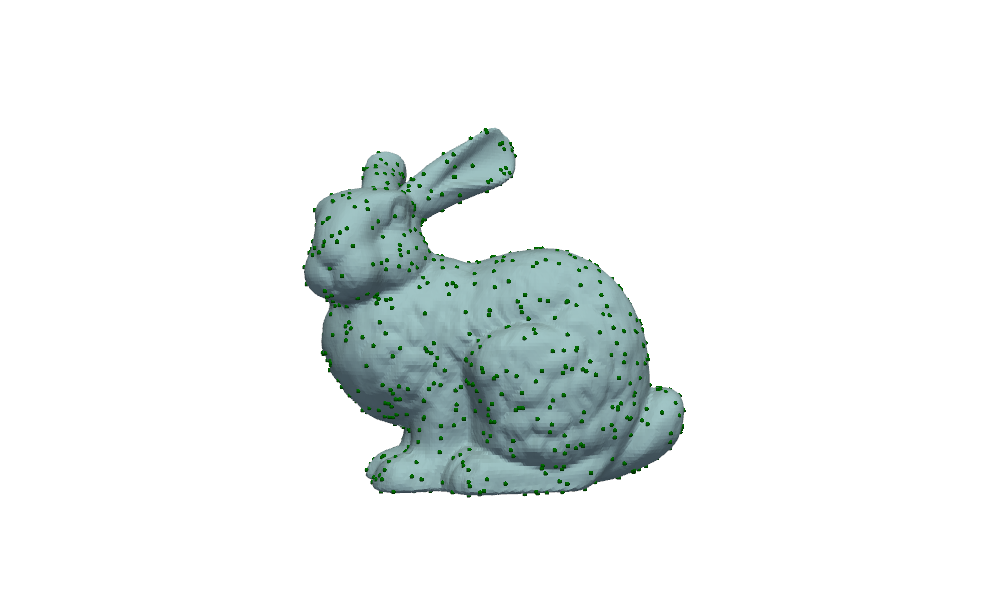

In [3]:
# this is what it looks like
Image.open('images/bunny_uniform.png')

# Geodesic vs edge distance
We can perform poisson sampling using either the exact geodesic distance, or the approximate edge distance. When the mesh is really fine, the two are very similar, but they may differ substantially in other contexts.

At the moment the edge distance computation is horribly inefficient, so just don't use it.

## Edge distance

In [5]:
from mesh_poisson_disk_sampling import edge_distance_poisson_disk_sampling

In [5]:
# load an example mesh
mesh = pv.examples.download_bunny_coarse()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

mesh = trimesh.Trimesh(vertices, faces)
vertices = np.array(mesh.vertices)
faces = np.array(mesh.faces)

In [ ]:
# this is not efficient at all, it takes a while even for small meshes
# based on your hardware, this can take up to 10 minutes

# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = edge_distance_poisson_disk_sampling(vertices, faces, min_dist = None, points_to_sample = None, num_points = 100, verbose = True)

In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

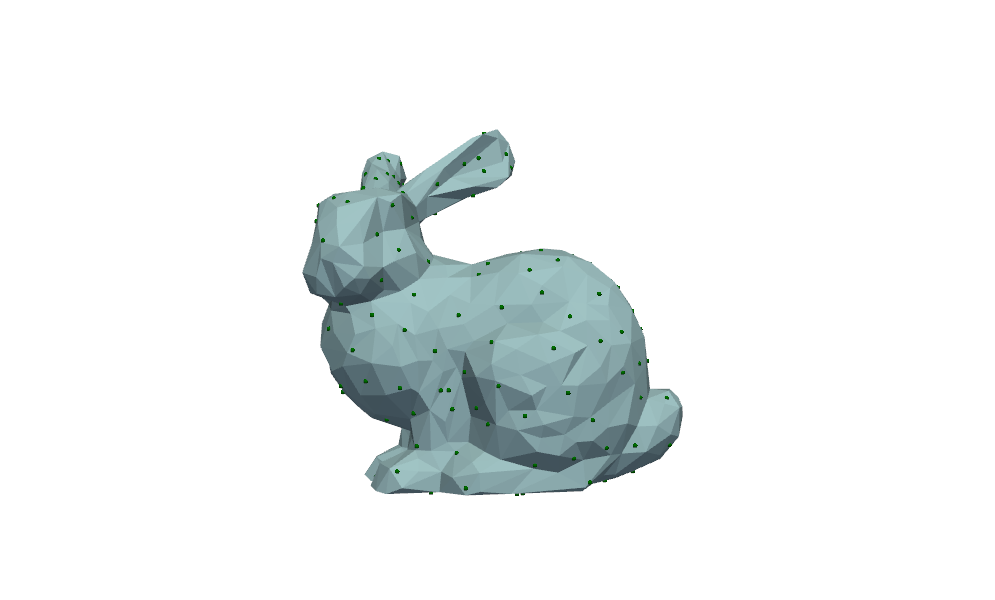

In [8]:
# this is what it looks like
Image.open('images/coarse_bunny_poisson_edgedist.png')

## Geodesic distance

In [ ]:
from mesh_poisson_disk_sampling import poisson_disk_sampling

In [9]:
# load an example mesh
mesh = pv.examples.download_bunny_coarse()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

mesh = trimesh.Trimesh(vertices, faces)
vertices = np.array(mesh.vertices)
faces = np.array(mesh.faces)

In [ ]:
# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = poisson_disk_sampling(vertices, faces, min_dist = None, points_to_sample = None, num_points = 100, verbose = True)

In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

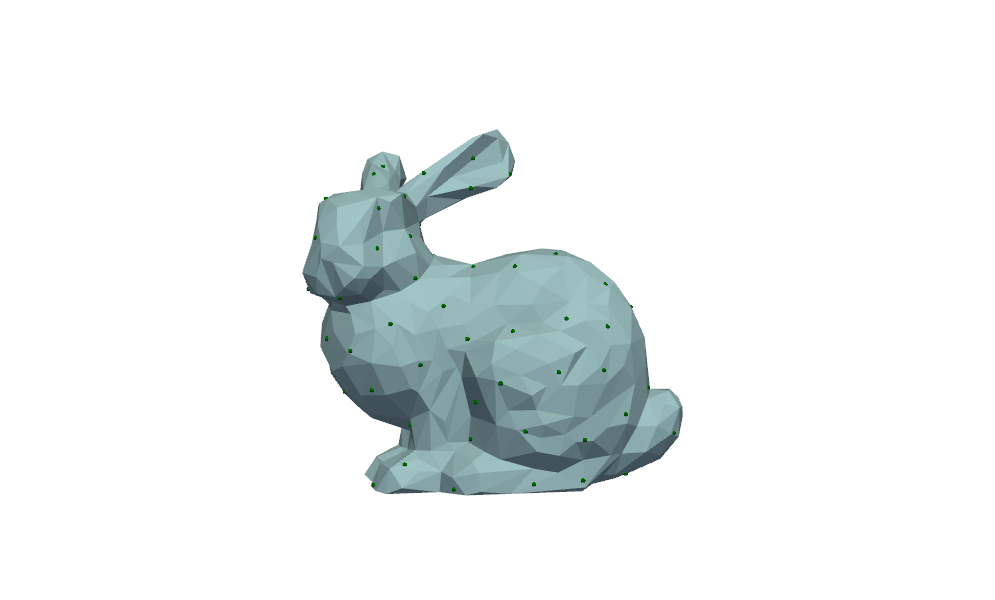

In [12]:
# this is what it looks like
Image.open('images/coarse_bunny_poisson.png')